In [1]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import spearmanr

In [2]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_ComplexStew/'

In [3]:
final_df=pd.read_csv('ComplexStew_MS_PerStep.csv')

In [4]:
filtered_stirstew = final_df[final_df['Step'].str.strip() == 'Stir Stew']
filtered_stirstew = filtered_stirstew[~filtered_stirstew['Participant'].isin(['C010', 'C022', 'C030'])]
filtered_stirstew
#C029 is not included

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
9,C002,28,Stir Stew,114.036756,182.004488,75.462707,106.145378,75.784500,710.157202,437.372259,334.352882
19,C004,30,Stir Stew,0.000000,143.411908,0.000000,76.926598,21.515681,460.668195,303.000311,208.132135
28,C005,46,Stir Stew,156.942825,395.658365,499.920146,563.429103,270.665309,1118.133664,653.662983,316.679881
46,C014,32,Stir Stew,227.091617,346.545732,221.352332,245.835485,179.367136,986.740793,702.386983,549.391652
56,C015,33,Stir Stew,347.806183,507.724735,432.090842,414.135636,458.578783,1190.581168,1116.672396,764.177645
66,C018,50,Stir Stew,56.849798,122.808691,54.108509,53.553696,93.753007,455.950906,282.756327,180.778963
76,C019,40,Stir Stew,71.582511,140.869081,0.000000,83.396543,178.080206,478.542995,318.821234,227.718322
90,C023,52,Stir Stew,111.778657,149.604708,150.357421,132.127479,170.026629,585.104100,406.843985,226.287122
100,C026,33,Stir Stew,175.164592,320.458210,172.334591,245.443317,143.912354,1265.417759,925.314665,605.216266
110,C027,41,Stir Stew,294.041869,321.837286,351.531484,331.585487,356.460480,967.750208,818.337178,500.231373


In [5]:
from sklearn.impute import KNNImputer
import numpy as np

filtered_stirstew = filtered_stirstew.copy()
imputer = KNNImputer(n_neighbors=1)

numerical_cols = filtered_stirstew.select_dtypes(include=['float64', 'int64']).columns
filtered_stirstew[numerical_cols] = filtered_stirstew[numerical_cols].replace(0, np.nan)

filtered_stirstew[numerical_cols] = imputer.fit_transform(filtered_stirstew[numerical_cols])
filtered_stirstew

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
9,C002,28.0,Stir Stew,114.036756,182.004488,75.462707,106.145378,75.784500,710.157202,437.372259,334.352882
19,C004,30.0,Stir Stew,56.849798,143.411908,54.108509,76.926598,21.515681,460.668195,303.000311,208.132135
28,C005,46.0,Stir Stew,156.942825,395.658365,499.920146,563.429103,270.665309,1118.133664,653.662983,316.679881
46,C014,32.0,Stir Stew,227.091617,346.545732,221.352332,245.835485,179.367136,986.740793,702.386983,549.391652
56,C015,33.0,Stir Stew,347.806183,507.724735,432.090842,414.135636,458.578783,1190.581168,1116.672396,764.177645
66,C018,50.0,Stir Stew,56.849798,122.808691,54.108509,53.553696,93.753007,455.950906,282.756327,180.778963
76,C019,40.0,Stir Stew,71.582511,140.869081,54.108509,83.396543,178.080206,478.542995,318.821234,227.718322
90,C023,52.0,Stir Stew,111.778657,149.604708,150.357421,132.127479,170.026629,585.104100,406.843985,226.287122
100,C026,33.0,Stir Stew,175.164592,320.458210,172.334591,245.443317,143.912354,1265.417759,925.314665,605.216266
110,C027,41.0,Stir Stew,294.041869,321.837286,351.531484,331.585487,356.460480,967.750208,818.337178,500.231373


In [6]:
new_column_names = {
    'Chest Distance': 'Chest Distance - Stir Stew',
    'HeadCamera Distance': 'HeadCamera Distance - Stir Stew',
    'LeftElbow Distance': 'LeftElbow Distance - Stir Stew',
    'LeftShoulder Distance': 'LeftShoulder Distance - Stir Stew',
    'MotionControllerLeft Distance': 'MotionControllerLeft Distance - Stir Stew',
    'MotionControllerRight Distance': 'MotionControllerRight Distance - Stir Stew',
    'RightElbow Distance': 'RightElbow Distance - Stir Stew',
    'RightShoulder Distance': 'RightShoulder Distance - Stir Stew'
}

# Rename columns
filtered_stirstew = filtered_stirstew.rename(columns=new_column_names)
filtered_stirstew

,Participant,Block Design Raw Score,Step,Chest Distance - Stir Stew,HeadCamera Distance - Stir Stew,LeftElbow Distance - Stir Stew,LeftShoulder Distance - Stir Stew,MotionControllerLeft Distance - Stir Stew,MotionControllerRight Distance - Stir Stew,RightElbow Distance - Stir Stew,RightShoulder Distance - Stir Stew
9,C002,28.0,Stir Stew,114.036756,182.004488,75.462707,106.145378,75.784500,710.157202,437.372259,334.352882
19,C004,30.0,Stir Stew,56.849798,143.411908,54.108509,76.926598,21.515681,460.668195,303.000311,208.132135
28,C005,46.0,Stir Stew,156.942825,395.658365,499.920146,563.429103,270.665309,1118.133664,653.662983,316.679881
46,C014,32.0,Stir Stew,227.091617,346.545732,221.352332,245.835485,179.367136,986.740793,702.386983,549.391652
56,C015,33.0,Stir Stew,347.806183,507.724735,432.090842,414.135636,458.578783,1190.581168,1116.672396,764.177645
66,C018,50.0,Stir Stew,56.849798,122.808691,54.108509,53.553696,93.753007,455.950906,282.756327,180.778963
76,C019,40.0,Stir Stew,71.582511,140.869081,54.108509,83.396543,178.080206,478.542995,318.821234,227.718322
90,C023,52.0,Stir Stew,111.778657,149.604708,150.357421,132.127479,170.026629,585.104100,406.843985,226.287122
100,C026,33.0,Stir Stew,175.164592,320.458210,172.334591,245.443317,143.912354,1265.417759,925.314665,605.216266
110,C027,41.0,Stir Stew,294.041869,321.837286,351.531484,331.585487,356.460480,967.750208,818.337178,500.231373


In [7]:
tracker_columns = ['Chest Distance - Stir Stew', 'HeadCamera Distance - Stir Stew', 'LeftElbow Distance - Stir Stew', 'LeftShoulder Distance - Stir Stew',
                   'RightElbow Distance - Stir Stew', 'RightShoulder Distance - Stir Stew', 'MotionControllerLeft Distance - Stir Stew',
                   'MotionControllerRight Distance - Stir Stew']
block_design_col = 'Block Design Raw Score'

# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_stirstew, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        # Calculate Spearman correlation and p-value without any filtering
        correlation, p_value = spearmanr(filtered_stirstew[block_design_col], filtered_stirstew[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_stirstew, tracker_columns, block_design_col)
correlation_df

,Tracker,Correlation,P-value
0,Chest Distance - Stir Stew,-0.205950,0.543489
1,HeadCamera Distance - Stir Stew,-0.127563,0.708576
2,LeftElbow Distance - Stir Stew,0.087358,0.798412
3,LeftShoulder Distance - Stir Stew,0.059226,0.862673
4,RightElbow Distance - Stir Stew,-0.150342,0.659047
5,RightShoulder Distance - Stir Stew,-0.378133,0.251531
6,MotionControllerLeft Distance - Stir Stew,0.359910,0.276948
7,MotionControllerRight Distance - Stir Stew,-0.223235,0.509370


In [8]:
#filtered_stirstew.to_csv('ComplexStew_StirStew.csv',index=False)

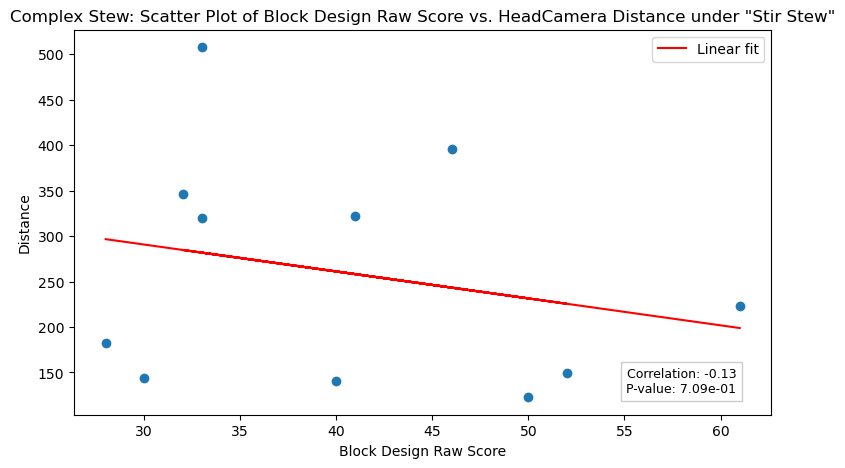

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

correlation, p_value = spearmanr(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['HeadCamera Distance - Stir Stew'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['HeadCamera Distance - Stir Stew'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['HeadCamera Distance - Stir Stew'], 1)
fit_line = slope * filtered_stirstew['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_stirstew['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. HeadCamera Distance under "Stir Stew"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '39 CS_StirStewDistanceHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

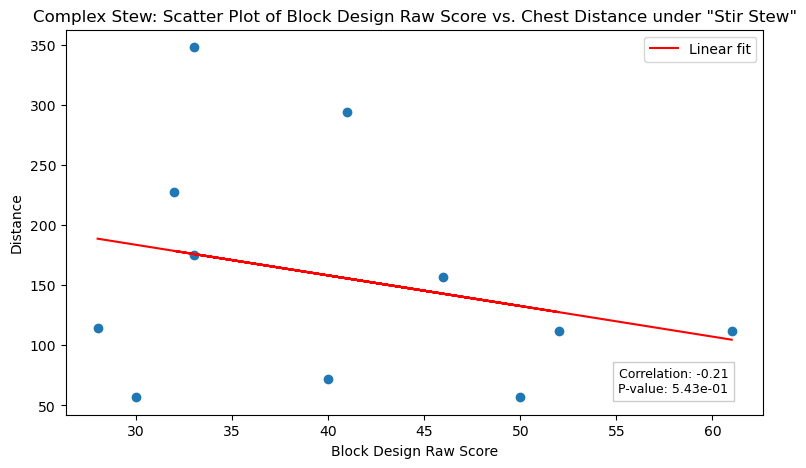

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

correlation, p_value = spearmanr(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['Chest Distance - Stir Stew'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['Chest Distance - Stir Stew'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['Chest Distance - Stir Stew'], 1)
fit_line = slope * filtered_stirstew['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_stirstew['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. Chest Distance under "Stir Stew"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '40 CS_StirStewDistanceChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

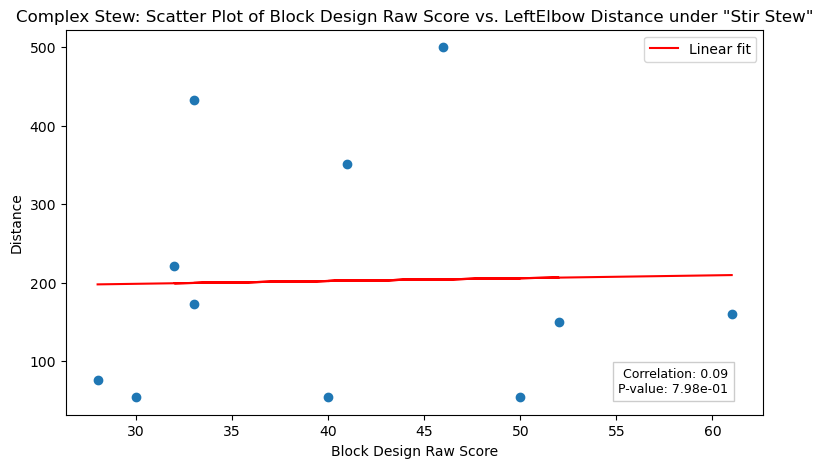

In [11]:
correlation, p_value = spearmanr(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['LeftElbow Distance - Stir Stew'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['LeftElbow Distance - Stir Stew'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['LeftElbow Distance - Stir Stew'], 1)
fit_line = slope * filtered_stirstew['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_stirstew['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. LeftElbow Distance under "Stir Stew"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '41 CS_StirStewDistanceLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

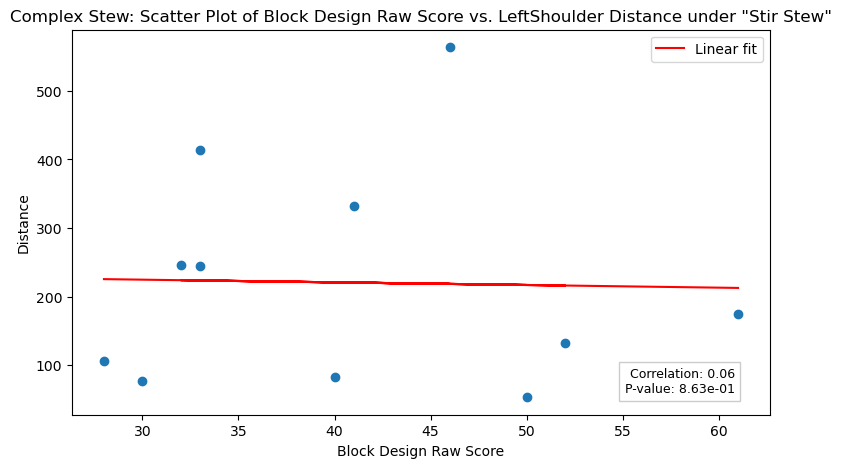

In [12]:
correlation, p_value = spearmanr(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['LeftShoulder Distance - Stir Stew'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['LeftShoulder Distance - Stir Stew'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['LeftShoulder Distance - Stir Stew'], 1)
fit_line = slope * filtered_stirstew['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_stirstew['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. LeftShoulder Distance under "Stir Stew"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '42 CS_StirStewDistanceLeftShoulder.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

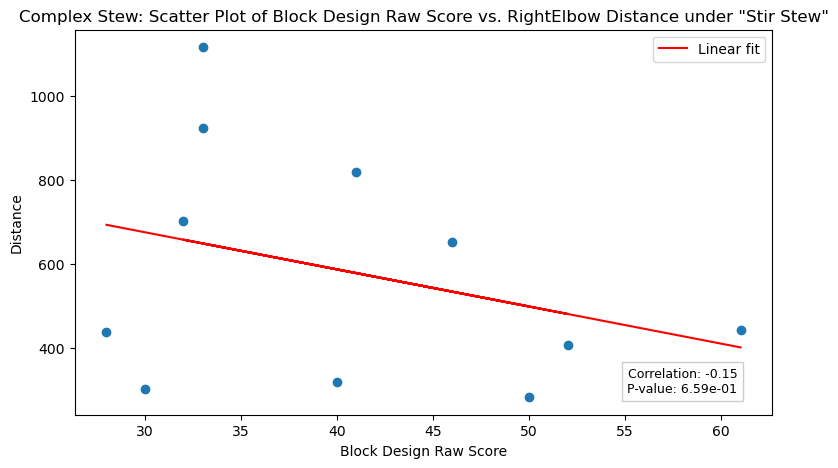

In [13]:
correlation, p_value = spearmanr(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['RightElbow Distance - Stir Stew'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['RightElbow Distance - Stir Stew'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['RightElbow Distance - Stir Stew'], 1)
fit_line = slope * filtered_stirstew['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_stirstew['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. RightElbow Distance under "Stir Stew"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '43 CS_StirStewDistanceRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

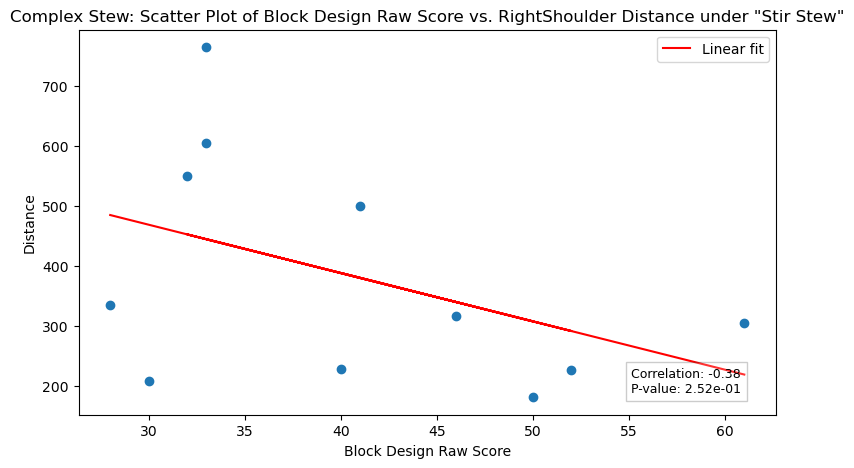

In [14]:
correlation, p_value = spearmanr(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['RightShoulder Distance - Stir Stew'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['RightShoulder Distance - Stir Stew'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['RightShoulder Distance - Stir Stew'], 1)
fit_line = slope * filtered_stirstew['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_stirstew['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. RightShoulder Distance under "Stir Stew"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '44 CS_StirStewDistanceRightShoulder.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

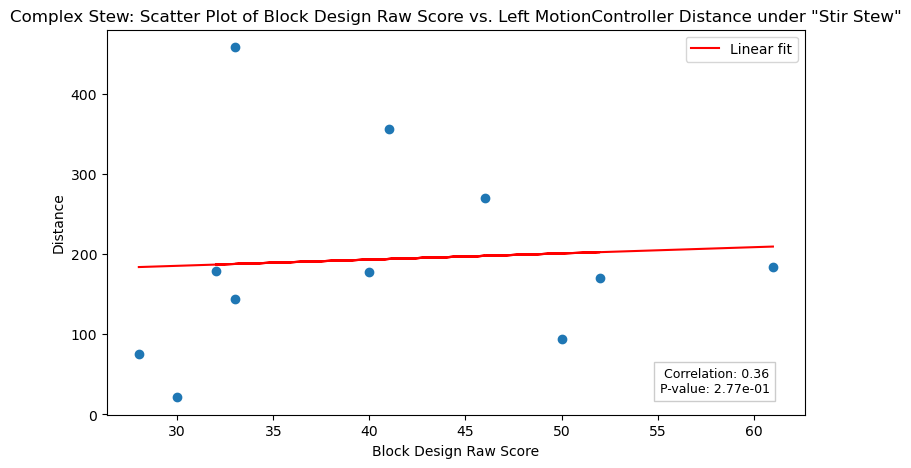

In [15]:
correlation, p_value = spearmanr(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['MotionControllerLeft Distance - Stir Stew'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['MotionControllerLeft Distance - Stir Stew'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['MotionControllerLeft Distance - Stir Stew'], 1)
fit_line = slope * filtered_stirstew['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_stirstew['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. Left MotionController Distance under "Stir Stew"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '45 CS_StirStewDistanceLeftControl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

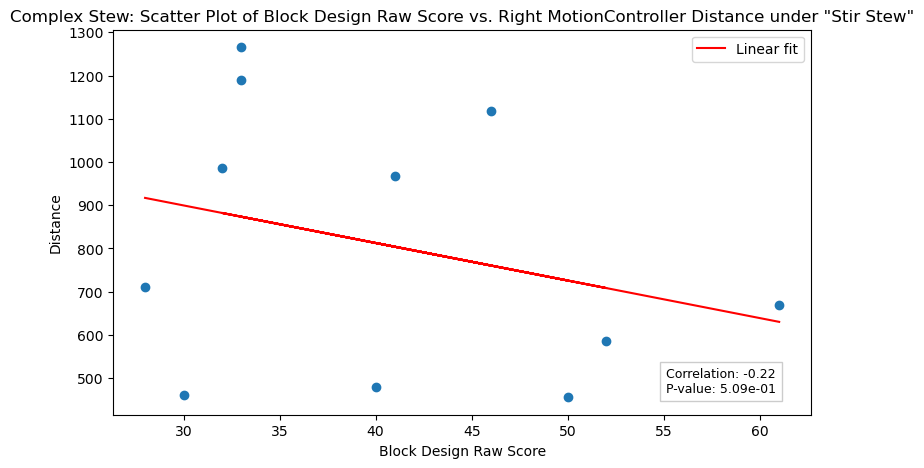

In [16]:
correlation, p_value = spearmanr(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['MotionControllerRight Distance - Stir Stew'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['MotionControllerRight Distance - Stir Stew'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['MotionControllerRight Distance - Stir Stew'], 1)
fit_line = slope * filtered_stirstew['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_stirstew['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. Right MotionController Distance under "Stir Stew"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '46 CS_StirStewDistanceRightControl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()